In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('../titanic/train (2).csv', index_col=["PassengerId"])
test = pd.read_csv('../titanic/test (2).csv', index_col=["PassengerId"])

## 데이터 전처리_train

In [4]:
#성별 구분
train.loc[train["Sex"]=="male", "Sex_encode"] = 0
train.loc[train["Sex"]=="female", "Sex_encode"] = 1
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [5]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [6]:
#요금(Fare)값 평균
mean_fare = train["Fare"].mean()

In [7]:
#표가격 빈칸 평균으로 채우기
train.loc[pd.isnull(train["Fare"]), "Fare"] = mean_fare
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

In [8]:
#타는 입구 구분
train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
train_embarked.head(10)

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [9]:
train = pd.concat([train, train_embarked], axis=1) #옆으로 붙이면 ax = 1 , 밑으로 붙이면 ax = 0 여러번 실행 금지

In [10]:
#Cabin -> 0, 1
train.loc[pd.isnull(train["Cabin"]), "Cabin_encode"] = 0
train.loc[pd.notnull(train["Cabin"]), "Cabin_encode"] = 1

In [11]:
#Mr, Mrs, Miss, Master 분류
def find_title(name) :
    name = name.split(", ")[1].split(".")[0]
    if name == "Mr" or name == "Master" or name == "Miss" or name == "Mrs" : 
        return name
    else : 
        return "Else"
train["Title"] = train["Name"].apply(find_title)
train[["Name", "Title"]].head(10)

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


In [12]:
#Title 분류하기
train_title = pd.get_dummies(train["Title"], prefix = "Title")
train_title.head(10)

,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,1,0,0,0
9,0,0,0,0,1


In [13]:
#Title 옆으로 붙이기
train = pd.concat([train, train_title], axis=1) #한번만!

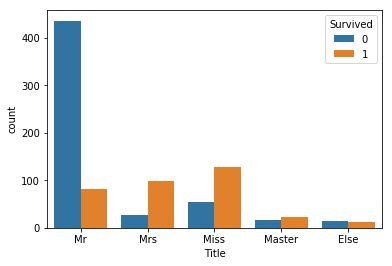

In [14]:
sns.countplot(data=train, x="Title",  hue= "Survived")

In [15]:
#Ticket 분류
def find_ticket(name) :
    if name.isdigit():
        name = int(0)
    else : 
        name = int(1)
    return name
#train["Ticket_encode"] = train["Ticket"].apply(find_ticket)

In [16]:
train["Ticket_encode"] = train["Ticket"].apply(find_ticket)
test["Ticket_encode"] = test["Ticket"].apply(find_ticket)

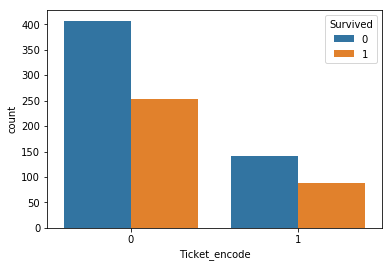

In [17]:
sns.countplot(data=train, x="Ticket_encode", hue= "Survived")

In [18]:
#나이 평균 구하기
mean_age = train["Age"].mean()

In [19]:
#나이 빈칸 채우기
train.loc[pd.isnull(train["Age"]), "Age"] = mean_age
test.loc[pd.isnull(test["Age"]), "Age"] = mean_age

In [20]:
#나이 분류
def div_age(age) :
    if age <= 7 : 
        return 5
    elif age <= 15 :
        return 10
    elif age <= 19 :
        return 17
    elif age <= 29 :
        return 24
    elif age <= 40 :
        return 35
    elif age <= 50 :
        return 45
    else : 
        return 60

In [21]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_encode', 'Title', 'Title_Else', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Ticket_encode'],
      dtype='object')

In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,Cabin_encode,Title,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Ticket_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0.0,Mr,0,0,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,1.0,Mrs,0,0,0,0,1,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,0.0,Miss,0,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,1,1.0,Mrs,0,0,0,0,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,1,0.0,Mr,0,0,0,1,0,0


## 데이터 전처리_test 

In [23]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_encode
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [24]:
#성별 구분
test.loc[test["Sex"]=="male", "Sex_encode"] = 0
test.loc[test["Sex"]=="female", "Sex_encode"] = 1
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [25]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_encode,Sex_encode
PassengerId,,,,,,,,,,,,


In [26]:
#표가격 빈칸 평균으로 채우기
# 위에서 함
#train.loc[pd.isnull(train["Fare"]), "Fare"] = mean_fare
#test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

In [27]:
#타는 입구 구분
test_embarked = pd.get_dummies(test["Embarked"], prefix = "Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [28]:
test = pd.concat([test, test_embarked], axis=1) #옆으로 붙이면 ax = 1 , 밑으로 붙이면 ax = 0 여러번 실행 금지

In [29]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_encode,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1.0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1.0,0,0,1


In [30]:
#Cabin -> 0, 1
test.loc[pd.isnull(test["Cabin"]), "Cabin_encode"] = 0
test.loc[pd.notnull(test["Cabin"]), "Cabin_encode"] = 1

In [31]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_encode,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,Cabin_encode
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0,0,1,0,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1.0,0,0,1,0.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0,0,1,0,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0,0,0,1,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1.0,0,0,1,0.0


In [32]:
#Title 분류하기
test["Title"] = test["Name"].apply(find_title)
test[["Name", "Title"]].head(10)
test_title = pd.get_dummies(test["Title"], prefix = "Title")
test_title.head()

,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,
892,0,0,0,1,0
893,0,0,0,0,1
894,0,0,0,1,0
895,0,0,0,1,0
896,0,0,0,0,1


In [33]:
test = pd.concat([test, test_title], axis=1)

In [34]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_C,Embarked_Q,Embarked_S,Cabin_encode,Title,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,0,1,0,0.0,Mr,0,0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0,0,1,0.0,Mrs,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,1,0,0.0,Mr,0,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,0,0,1,0.0,Mr,0,0,0,1,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0,0,1,0.0,Mrs,0,0,0,0,1


In [35]:
#위에서 함
#test["Ticket_encode"] = test["Ticket"].apply(find_ticket)

In [36]:
#나이 빈칸 채우기
#위에서 넣음
#train.loc[pd.isnull(train["Age"]), "Age"] = mean_age
#test.loc[pd.isnull(test["Age"]), "Age"] = mean_age

In [37]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Ticket_encode', 'Sex_encode', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_encode', 'Title', 'Title_Else',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [38]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_C,Embarked_Q,Embarked_S,Cabin_encode,Title,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,0,1,0,0.0,Mr,0,0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0,0,1,0.0,Mrs,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,1,0,0.0,Mr,0,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,0,0,1,0.0,Mr,0,0,0,1,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0,0,1,0.0,Mrs,0,0,0,0,1


## 모델생성

In [39]:
feature_names = ["Sex_encode", "Age", "Pclass", "SibSp", "Parch",
                 "Embarked_C", "Embarked_Q", "Embarked_S", "Fare", "Ticket_encode", 
                 "Title_Else", "Title_Master", "Title_Miss", "Title_Mr", "Title_Mrs"] #나중에 여기만 추가 삭제하면 됨

In [40]:
X_train = train[feature_names]
X_train.head()

,Sex_encode,Age,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Fare,Ticket_encode,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,
1,0.0,22.0,3,1,0,0,0,1,7.2500,1,0,0,0,1,0
2,1.0,38.0,1,1,0,1,0,0,71.2833,1,0,0,0,0,1
3,1.0,26.0,3,0,0,0,0,1,7.9250,1,0,0,1,0,0
4,1.0,35.0,1,1,0,0,0,1,53.1000,0,0,0,0,0,1
5,0.0,35.0,3,0,0,0,0,1,8.0500,0,0,0,0,1,0


In [41]:
X_test = test[feature_names]
X_test.head()

,Sex_encode,Age,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Fare,Ticket_encode,Title_Else,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,
892,0.0,34.5,3,0,0,0,1,0,7.8292,0,0,0,0,1,0
893,1.0,47.0,3,1,0,0,0,1,7.0000,0,0,0,0,0,1
894,0.0,62.0,2,0,0,0,1,0,9.6875,0,0,0,0,1,0
895,0.0,27.0,3,0,0,0,0,1,8.6625,0,0,0,0,1,0
896,1.0,22.0,3,1,1,0,0,1,12.2875,0,0,0,0,0,1


In [42]:
y_train = train["Survived"]

In [78]:
from sklearn.tree import DecisionTreeClassifier
seed = 0
model = DecisionTreeClassifier(max_depth=7, random_state=seed)

In [79]:
#학습
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [45]:
!pip install graphviz

## Predict

In [80]:
prediction = model.predict(X_test)
prediction[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

## Submit

In [81]:
submisseion = pd.read_csv('../titanic/gender_submission (2).csv', index_col=["PassengerId"])

In [82]:
submisseion["Survived"] = prediction
submisseion.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [49]:
submisseion.to_csv("titanic_Submission.csv")

### 선형 회귀

In [83]:
%matplotlib inline
from preamble import *
import mglearn
import sklearn

In [84]:
from sklearn.linear_model import LinearRegression #암기
X, y = X_train, y_train

from sklearn.model_selection import train_test_split #암기
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train_2, y_train_2)

In [85]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train_2, y_train_2)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test_2, y_test_2)))
#훈현세트와 테스트세트의 점수가 낮으면서 매우 비슷 -> 과소적합

훈련 세트 점수: 0.44
테스트 세트 점수: 0.44


### 릿지 회귀

In [163]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train_2, y_train_2)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test_2, y_test_2)))

훈련 세트 점수: 0.44
테스트 세트 점수: 0.45


In [87]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]

In [88]:
for al in alpha_list:
    ridge10 = Ridge(al).fit(X_train_2, y_train_2)
    print ("알파 = ",  al)
    print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train_2, y_train_2)))
    print("        테스트 세트 점수: {:.2f}".format(ridge10.score(X_test_2, y_test_2)))

알파 =  0.0001
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  0.001
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  0.005
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  0.01
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  0.05
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  0.1
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.44
알파 =  1
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.43
알파 =  10
훈련 세트 점수: 0.44
        테스트 세트 점수: 0.42
알파 =  100
훈련 세트 점수: 0.41
        테스트 세트 점수: 0.40


In [ ]:
submisseion["Survived"] = gbrt.predict(X_test)
submisseion.head()
submisseion.to_csv("titanic_Submission_n.csv")

### 라소 회귀

In [69]:
import numpy as np
from sklearn.linear_model import Lasso

In [89]:
# 기본값: alpha=1.0, max_iter=1000
lasso = Lasso(alpha=0.0001, max_iter=10000).fit(X_train_2, y_train_2)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train_2, y_train_2)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test_2, y_test_2)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.44
테스트 세트 점수: 0.44
사용한 특성의 개수: 14


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [242]:
LogisticRegression(random_state=0, C=1).fit(X_train, y_train) # 유력!!

C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [243]:
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train_2, y_train_2)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test_2, y_test_2)))

훈련 세트 점수: 0.822
테스트 세트 점수: 0.803


In [244]:
logreg100 = LogisticRegression(C=0.1).fit(X_train, y_train) # 유력!!
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
#print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test_2, y_test_2)))

훈련 세트 점수: 0.817


C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.65
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.70
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.84
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.81
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.84
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.83


C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'cancer' is not defined

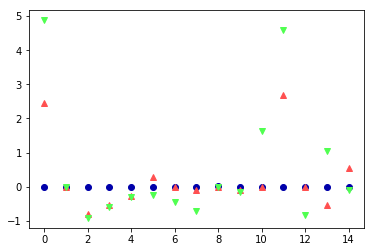

In [175]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train_2, y_train_2)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train_2, y_train_2)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test_2, y_test_2)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [245]:
submisseion["Survived"] = logreg100.predict(X_test)
submisseion.head()
submisseion.to_csv("titanic_Submission_laso.csv")

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train_2, y_train_2)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train_2, y_train_2)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test_2, y_test_2)))

훈련 세트 정확도: 0.862
테스트 세트 정확도: 0.825


#### GradientBoosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
#학습률을 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=5)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_2, y_train_2)))
#print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_2, y_test_2)))

훈련 세트 정확도: 0.957


In [173]:
submisseion["Survived"] = gbrt.predict(X_test)
submisseion.head()
submisseion.to_csv("titanic_Submission_gbrt.csv")

#### SVC

In [185]:
from sklearn.svm import LinearSVC

In [231]:
model = LinearSVC(random_state=0, C = 1)
model.fit(X_train_2, y_train_2)

C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [232]:
print(model.score(X_train_2, y_train_2))
print(model.score(X_test_2, y_test_2))

0.8278443113772455
0.8251121076233184


In [233]:
svc = model.fit(X_train, y_train)
print(model.score(X_train, y_train))
#print(model.score(X_test_2, y_test_2))

0.792368125701459


C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [234]:
submisseion["Survived"] = svc.predict(X_test)
submisseion.head()
submisseion.to_csv("titanic_Submission_svc.csv")

### 최종 파일 출력

In [147]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=6)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [149]:
submisseion["Survived"] = gbrt.predict(X_test)
submisseion.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1


In [150]:
submisseion.to_csv("titanic_Submission_n.csv")